# <b>Introdução</b>
***

## Quem Somos?

Nosso grupo é composto por 3 integrantes:

<table style='align:center'>
  <tr>
    <td align="center"><a href="https://github.com/DaviReisVieira"><img style="border-radius: 50%;" src="https://github.com/DaviReisVieira.png" width="100px;" alt=""/><br /><sub><b>Davi Reis Vieira</b></sub></a><br /><a href="https://github.com/DaviReisVieira" title="Davi Reis Vieira">O Cara -1</a></td>
    <td align="center"><a href="https://github.com/fran-janela"><img style="border-radius: 50%;" src="https://github.com/fran-janela.png" width="100px;" alt=""/><br /><sub><b>Francisco Janela</b></sub></a><br /><a href="https://github.com/fran-janela" title="Francisco Janela">O cara 0</a></td>
    <td align="center"><a href="https://github.com/henriquemf"><img style="border-radius: 50%;" src="https://github.com/henriquemf.png" width="100px;" alt=""/><br /><sub><b>Henrique Frezzatti</b></sub></a><br /><a href="https://github.com/henriquemf" title="Henrique Frezzatti">O cara +1</a></td>
  </tr>
</table>

# <b>Bibliotecas Utilizadas</b>
***

In [1]:
%matplotlib inline
from pprint import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# <b>Carregando os Dados</b>
***

O dataset a ser utilizado é o Spaceship Titanic. Ele possui um conjunto de treino e um conjunto de teste já previamente separados pelo próprio autor da base. Essa base se trata de um dataset fictício, criado com o intuito de simular o problema de Machine Learning original do Titanic. Abaixo se encontra o link para o dataset:

<a href="https://www.kaggle.com/competitions/spaceship-titanic">Link para Download do Dataset e Dados Completos</a> 

Tendo isso em vista, o propósito inicial do projeto se trata de construir um modelo de _Machine Learning_ para prever se o passageiro a bordo da nave espacial foi teletransportado para uma outra dimensão ou não. Ou seja, essa variável é a nossa _feature_ a qual será trabalhada visando obtê-la no final do processo de treinamento do modelo. 

In [2]:
data = pd.read_csv("data.csv")
validation = pd.read_csv("validation.csv")

Abaixo, rodamos os comandos a seguir com o intuito de saber com quantos dados estaremos trabalhando durante o projeto.

In [3]:
print('Dataset de Dados | Total de Linhas: {}. Total de Colunas: {}' .format(data.shape[0],data.shape[1]))
print('Dataset de Validação | Total de Linhas: {}. Total de Colunas: {}' .format(validation.shape[0],validation.shape[1]))

Dataset de Dados | Total de Linhas: 8693. Total de Colunas: 14
Dataset de Validação | Total de Linhas: 4277. Total de Colunas: 13


# <b>Analisando Variáveis</b>
***

Com o arquivo guardado na forma de um _dataframe_, agora é possível lê-lo com facilidade para os usos necessários. Abaixo está sendo mostrando os primeiros 10 itens de ambos os arquivos .csv (os dados e o validation).

In [4]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [5]:
validation.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### Conclusão da análise de variáveis

Após analisar com o .info(), é possível perceber que existem alguns diversos valores faltantes para algumas diversas variáveis, sendo estas tanto categóricas como numéricas, o que será necessário a implementação de um _imputer_ adequado e, para isso, será realizada uma análise de diferentes modelos de _imputer_ para, no fim, decidir qual usar para a melhor acurácia possível para podermos treinar o modelo da maneira correta.

### Variáveis e significados

As variáveis presentes no _dataset_ são as seguintes:

- <span style="color: blue;">PassangerId (numérico)</span> = ID do passageiro, um valor único que identifica o passageiro em questão;
- <span style="color: blue;"> HomePlanet (categórico)</span> = Planeta do qual o passageiro em questão se origina ou onde reside;
- <span style="color: blue;"> CryoSleep (categórico)</span> = Indica se o passageiro está ou não em um sono criogênico, ou seja, se está isolado em uma cabine em um compartimento selado em sono profundo;
- <span style="color: blue;"> Cabin (categórico) </span> = Indica o número e o local da cabine onde o passageiro está acomodado;
- <span style="color: blue;"> Destination (categórico) </span> = Indica o planeta de destino do passageiro;
- <span style="color: blue;"> Age (numérico) </span> = Idade do passageiro;
- <span style="color: blue;"> VIP (categórico) </span> = Indica se o passageiro tem ou não acesso a serviços VIP durante a viagem;
- <span style="color: blue;"> RoomService, FoodCourt, ShoppingMall, Spa, VRDeck (todos numéricos) </span> = Indicam o tanto que foi gasto pelo passageiro em cada um desses serviços;
- <span style="color: blue;"> Name (categórico) </span> = Nome e sobrenome do passageiro;

# <b>Analisando as Variáveis Categóricas</b>
***

Abaixo, será realizada uma análise de cada uma das variáveis categóricas, visando saber quantos valores de cada opção existente estão presentes em cada uma delas, além de remover variáveis que não influenciam no resultado direto da *_target_*, como Nome e ID. Além disso, também será analisado a correlação de cada uma das variáveis categóricas com a nossa variável _*target*_.

##### <b>Home Planet</b>

In [8]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

##### <b>Cryo Sleep</b>

In [9]:
data["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

##### <b>Destination</b>

In [10]:
data["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

##### <b>VIP</b>

In [11]:
data["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

Removendo variáveis indiferentes para o resultado final

In [12]:
data.drop(["PassengerId", "Name"], axis=1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


Separando a base de dados em uma base com apenas os dados categóricos relevantes.

In [13]:
data_cat = data.loc[:, ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]]
data_cat

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False
...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,True
8689,Earth,True,G/1499/S,PSO J318.5-22,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,False
8691,Europa,False,E/608/S,55 Cancri e,False


##### <b>Transported</b>

In [14]:
target = data.loc[:, ["Transported"]]
target.value_counts()

Transported
True           4378
False          4315
dtype: int64

#### <b>Histograma</b>

Abaixo, será plotado um gráfico para possibilitar a visualização da correlação entre cada uma das variáveis categóricas e o _*target*_, mostrando em que casos é mais provável que seja *True* ou *False*.

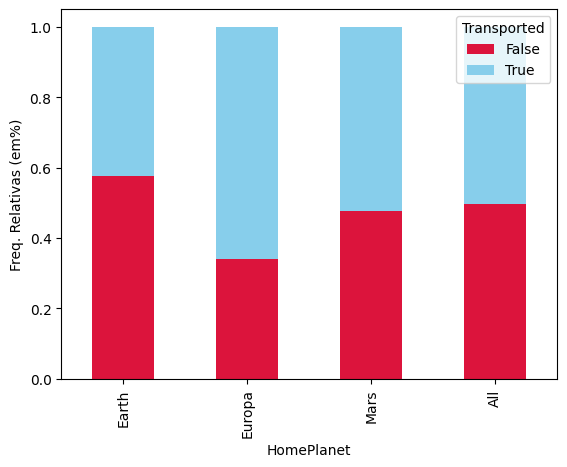

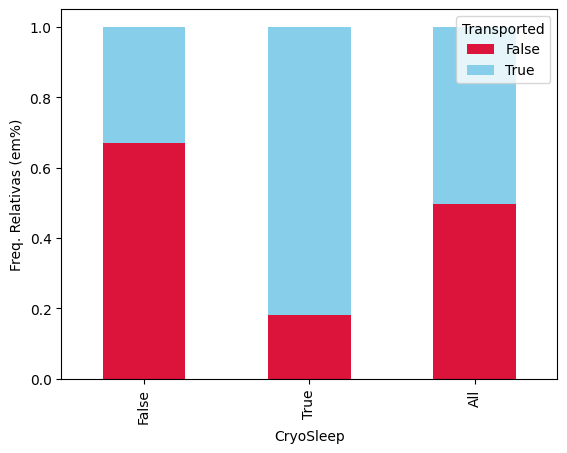

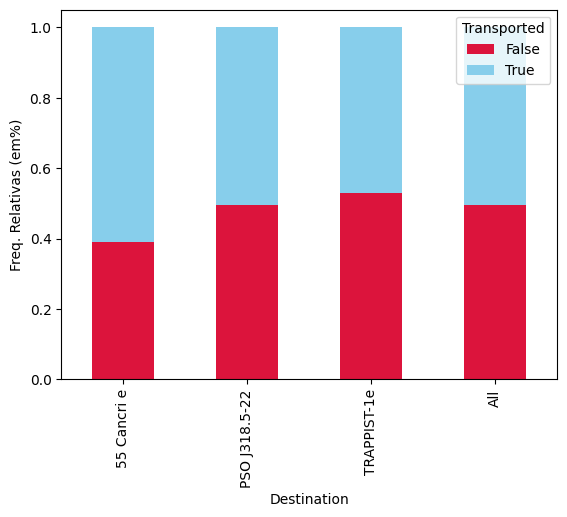

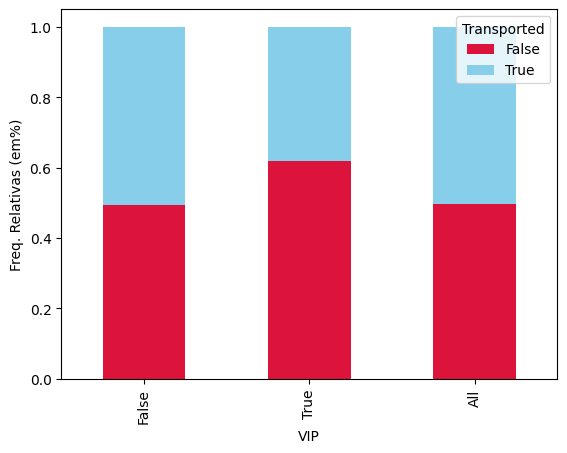

In [15]:
lista=["HomePlanet",'CryoSleep','Destination','VIP']
cores = ['crimson','skyblue']
n=0

for i in lista:
    Transported_x_y=pd.crosstab(data[i], data['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

## <b> Análise dos gráficos </b>

***

#### <b>HomePlanet</b>

A partir do gráfico gerado, é possível notar que a probabilidade de um passageiro ser teletransportado para outra dimensão acaba sendo maior para os casos em que seu planeta de origem é Europa, podendo resultar em uma possível correlação entre esses fatores.

#### <b>CryoSleep</b>

Com esse gráfico, a probabilidade de um passageiro que esteja em Cryo Sleep seja teletransportado é de mais de 80%, o que pode indicar uma forte correlação entre a <b>_target_</b> essa variável. 

#### <b>Destination</b>

Com os resultados obtidos, o planeta de destino que mais gerou casos de passageiros sendo teletransportados foi o 55 Cancri e, porém, sua correlação não é muito grande, sendo que apenas 60% dos casos foram verdadeiros, mas ainda não é possível descartar essa variável.

#### <b>VIP</b>

Nesse caso, quando o passageiro possuia acesso aos serviços VIP, isso resultou em uma menor probabilidade de ter sido teletransportado, o que pode ser um indício de uma boa correlação entre essas duas variáveis.

****

Abaixo, será realizado um split visando separar as diferentes classificações possíveis para identificar a localização da cabine do passageiro, sendo elas: deck, num e side.

- Deck = Altura;
- Num = Número da cabine;
- Side = P (Port) ou S (Starboard)

In [16]:
data[['deck','num','side']] = data['Cabin'].str.split('/', expand = True)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


Com essas variáveis divididas, é possível analisar as diferentes correlações entre cada uma das variáveis de Cabin com a variável <b>_target_</b>, podendo interpretar se a posição do passageiro na espaçonave é um diferencial ou não.

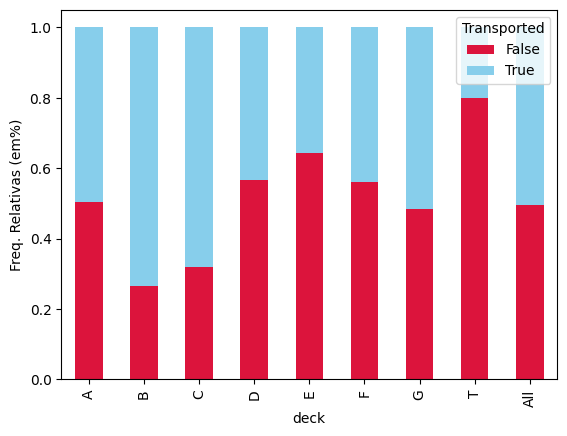

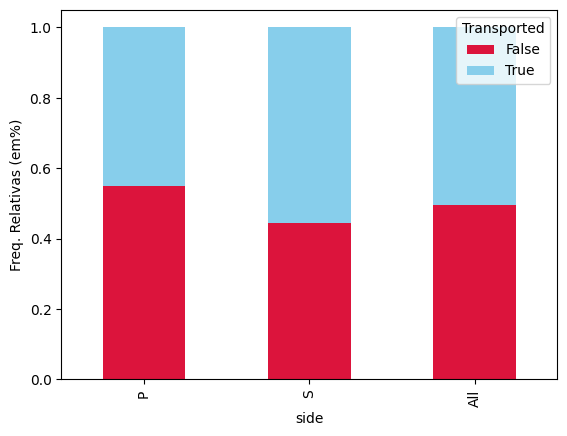

In [17]:
lista=["deck",'side',]
cores = ['crimson','skyblue']
n=0

for i in lista:
    Transported_x_y=pd.crosstab(data[i], data['Transported'], normalize='index',margins=True).round(4)
    Transported_x_y.plot.bar(color=cores, stacked=True)
    plt.ylabel("Freq. Relativas (em%)")
    plt.xlabel(i)
plt.show()

## <b>Análise dos gráficos </b>
***

#### <b> Deck </b>

Com o gráfico obtido nessa variável, é possível interpretar que os andares com maior probabilidade de fazer com que o passageiro seja teletransportado são os andares B e C, podendo indicar que essa posição em específico faça com que a chance de isso ocorrer aumente.

#### <b> Side </b>

A partir do gráfico obtido, pode-se dizer que a diferença de probabilidade de se obter _True_ na variável do <b>_target_</b> entre o side P ou S é muito pequena, apesar de que caso o passageiro se encontre na Starboard, a sua probabilidade é maior, podendo indicar uma não relevância dessa variável para a mudança do <b>_target_</b>.

***

/var/folders/8d/d5by2ryj0lb7mrtngnh40lzr0000gn/T/ipykernel_82152/823273497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['num'] = data_test['num'].astype(int)


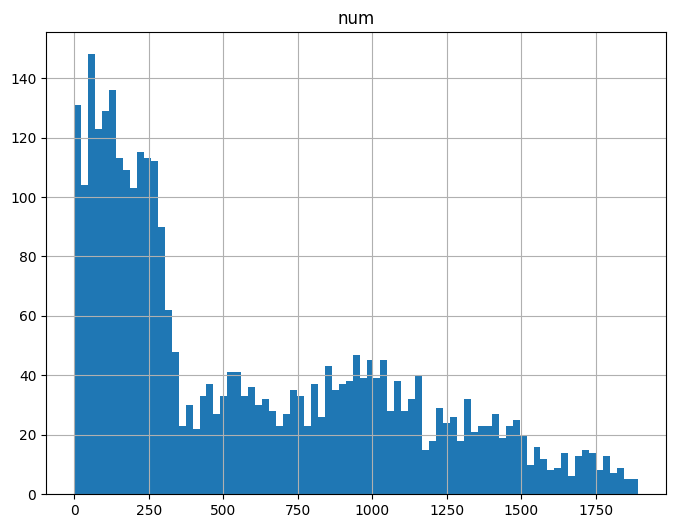

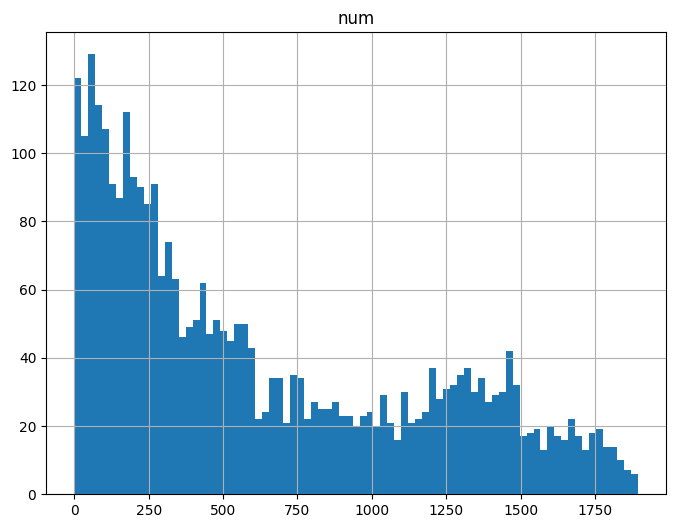

In [18]:
# create data test for all non nan num values
data_test = data.dropna()
# transform column num to integer
data_test['num'] = data_test['num'].astype(int)
# plot histogram for transported True
data_test.loc[data_test["Transported"] == True].loc[:, ["num"]].hist(bins=int(np.sqrt(len(data_test))), figsize=(8,6));
data_test.loc[data_test["Transported"] == False].loc[:, ["num"]].hist(bins=int(np.sqrt(len(data_test))), figsize=(8,6));

#<b > Analisando as variáveis numéricas</b>
***

Agora, será separado as variáveis numéricas do resto da base de dados, para que também seja possível a análise de cada uma delas e suas correlações com a <b>_target_</b>.

In [19]:
data_num = data.loc[:, ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
data_num

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [20]:
BINS = int(np.sqrt(len(data_num.index)))

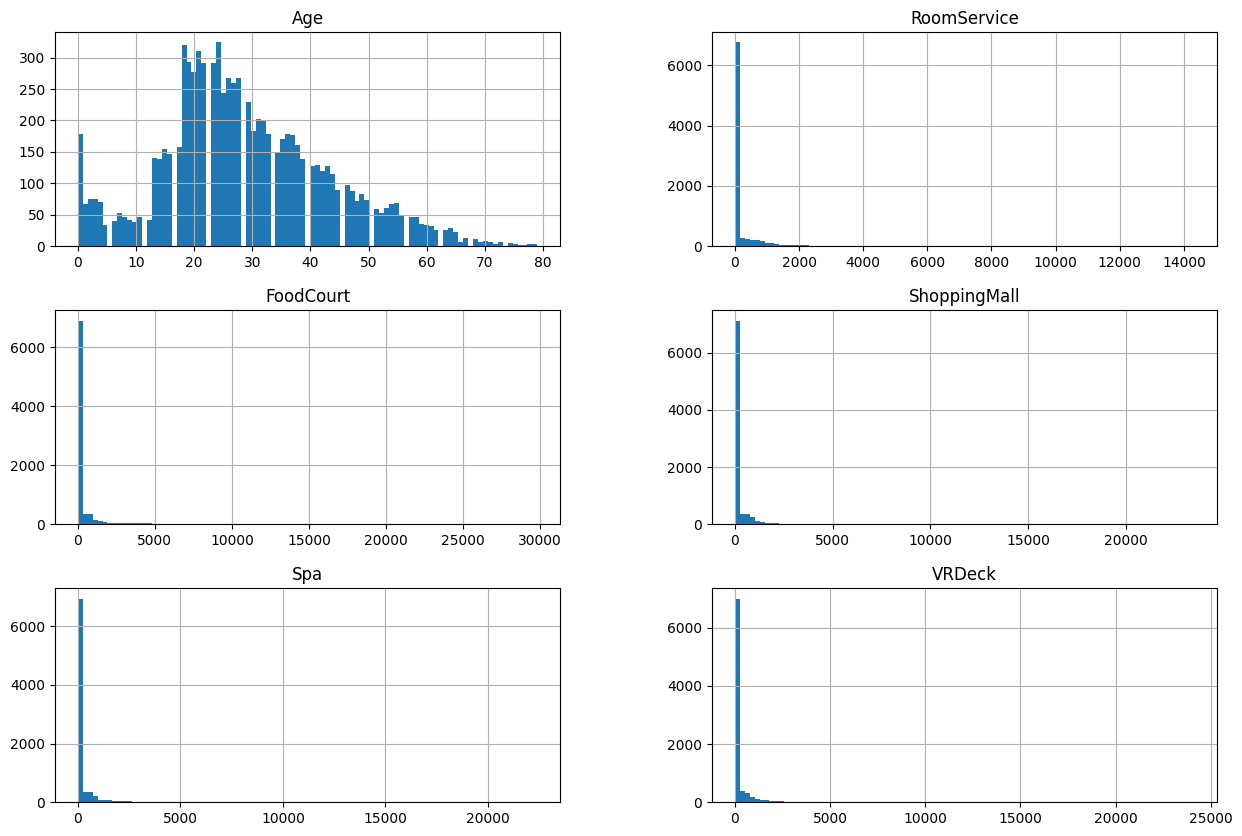

In [21]:
data_num.hist(bins=BINS, figsize=(15,10));

## <b>Analisando gráficos</b>
***

#### <b>RoomService, Spa, VRDeck, FoodCourt, ShoppingMail</b>

A partir dos gráficos acima, podemos perceber que as variáveis numéricas, com exceção de Age, possuem muitos valores nulos, isso ocorre quando o passageiro não possui nenhum gasto nesses serviços. Com isso, vamos analisar para encontrarmos em que casos isso mais ocorre.
***

Abaixo, foi realizada uma tentativa de normalização do gráfico de RoomService para melhor interpretação dos dados, mas sem sucesso.

<AxesSubplot: ylabel='Frequency'>

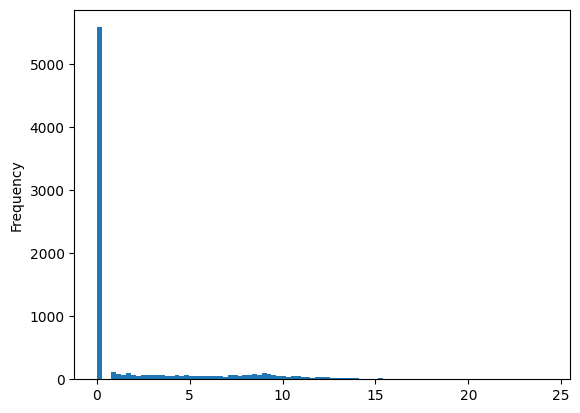

In [22]:
data_num["RoomService"].apply(np.cbrt).plot.hist(bins = BINS)

In [23]:
data.loc[data["CryoSleep"] == True].loc[:, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].value_counts()

RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0.0          0.0        0.0           0.0  0.0       2690
dtype: int64

Acima, é possível perceber que quando o passageiro está em estado de CryoSleep, ele não vai possuir nenhum gasto com as ofertas da nave. Isso pode ser levado em consideração para preencher alguns valores nulos de gasto.

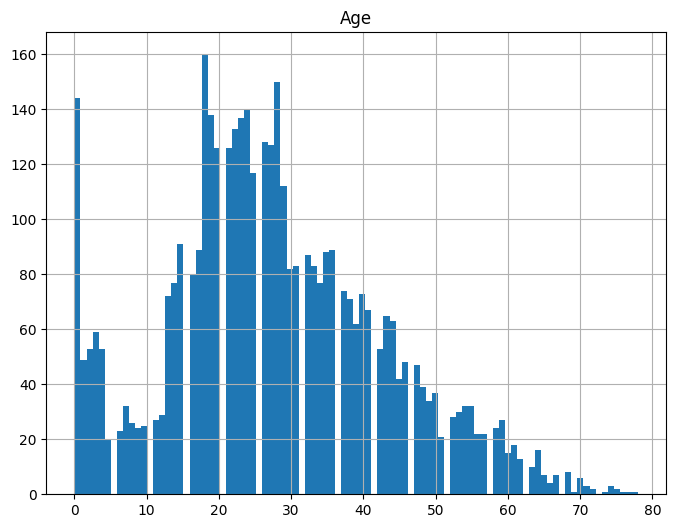

In [24]:
data.loc[data["Transported"] == True].loc[:, ["Age"]].hist(bins=BINS, figsize=(8,6));

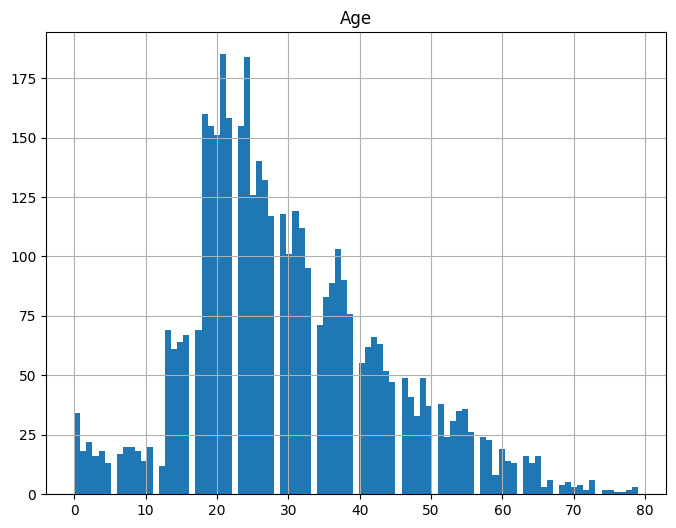

In [25]:
data.loc[data["Transported"] == False].loc[:, ["Age"]].hist(bins=BINS, figsize=(8,6));

A partir dos gráficos acima, é possível interpretar que, ainda que aparente não possuir muita relação, podemos notar uma leve diferença com relação aos passageiros mais novos, que tiveram uma chance maior de serem teletransportados.

# Limpeza e Preenchimento
***

Para começar, baseado na análise das variáveis de CryoSleep e despezas na nave, serão preenchidos todos os gastos com zero daquelas pessoas que estavam viajando em CryoSleep.

In [26]:
data.loc[data["CryoSleep"] == True, ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = 0 

Depois de preenchidos estes valores, outros resultados serão preenchidos utilizando a melhor função de **Inputer**, que será medida pela acurácia do CrossValidation com a padronização de um modelo de classificação.

# Análise de Inputers
***

Agora, será realizado uma regressão para determinar qual o melhor tipo de *Imputer* para podermos aplicar na base de dados original para os dados faltantes. Os tipos de inputer testados serão o SimpleImputer, IterativeImputer e KNNImputer.

In [39]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

data_for_input = data.drop(["PassengerId", "Name", "Cabin", "deck", "side", "HomePlanet",'Destination'], axis=1)

#Separação atributos(X) e target(y):
y_train = data_for_input.loc[:,"Transported"]
X_train = data_for_input.drop(["Transported"], axis=1)

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Definindo o número de cortes para o CrossValidation
N_SPLITS = 10
# Criando o nosso regressor com a seed randômica configurada acima:
regressor = RandomForestRegressor(random_state=RAND_SEED)

In [41]:
def get_scores_for_imputer(imputer, X, y):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator, X, y, scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return impute_scores

In [42]:
# Simple Imputer:
def get_impute_simple_score(X, y):
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    mean_impute_scores = get_scores_for_imputer(imputer, X, y)
    return mean_impute_scores.mean(), mean_impute_scores.std()

# Interactive Imputer:
def get_impute_iterative_score(X, y):
    imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        max_iter=1,
        sample_posterior=True,
    )
    iterative_impute_scores = get_scores_for_imputer(imputer, X, y)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

# KNN Imputer:
def get_impute_knn_score(X, y):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X, y)
    return knn_impute_scores.mean(), knn_impute_scores.std()

In [43]:
# Criando as listas
x_labels = []

score_mean_list = np.zeros(3)
score_std_list = np.zeros(3)

## Aplicando os Testes:
# Simple Imputer
score_mean_list[0], score_std_list[0] = get_impute_simple_score(X_train, y_train)
x_labels.append("Simple Imputer")

# Interactive Imputer:
score_mean_list[1], score_std_list[1] = get_impute_iterative_score(X_train, y_train)
x_labels.append("Interactive Imputer")

# KNN Imputer:
score_mean_list[2], score_std_list[2] = get_impute_knn_score(X_train, y_train)
x_labels.append("KNN Imputer")

In [ ]:
n_bars = len(score_mean_list)
xval = np.arange(n_bars)

colors = ["r", "g", "orange"]

# Invertendo o valor das médias para torná-las positivas:
score_mean_list = score_mean_list*-1

# Plotando os Resultados
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        score_mean_list[j],
        xerr=score_std_list[j],
        color=colors[j],
        alpha=0.6,
        align="center",
    )

ax1.set_title("Score dos Imputer [menor melhor]")
ax1.set_xlim(left=np.min(score_mean_list) * 0.9, right=np.max(score_mean_list) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("RMSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)


plt.show()

In [33]:
from sklearn.preprocessing import OneHotEncoder

data_cat = data.loc[:, ["HomePlanet", "CryoSleep", "Destination", "VIP", "deck", "side"]]

meu_one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
meu_one_hot_encoder.fit_transform(data_cat)


# concat data_cat with data
data_encoded = pd.concat([data, pd.DataFrame(meu_one_hot_encoder.fit_transform(data_cat), columns=meu_one_hot_encoder.get_feature_names())], axis=1)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8693 non-null   object 
 1   HomePlanet        8492 non-null   object 
 2   CryoSleep         8476 non-null   object 
 3   Cabin             8494 non-null   object 
 4   Destination       8511 non-null   object 
 5   Age               8514 non-null   float64
 6   VIP               8490 non-null   object 
 7   RoomService       8580 non-null   float64
 8   FoodCourt         8580 non-null   float64
 9   ShoppingMall      8581 non-null   float64
 10  Spa               8575 non-null   float64
 11  VRDeck            8567 non-null   float64
 12  Name              8493 non-null   object 
 13  Transported       8693 non-null   bool   
 14  deck              8494 non-null   object 
 15  num               8494 non-null   object 
 16  side              8494 non-null   object 


/Users/fpj_mac/Desktop/Insper/6ºSemestre/MachineLearning/projeto-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
